In [37]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# load the excel sheet into a Dataframe
xls = pd.ExcelFile("UW_Churn_Pred_Data.xls")
print(f"Sheet Names: {xls.sheet_names}")

Sheet Names: ['Data', 'Legend', 'N10', 'B30 Pro']


In [39]:
# Load the B30 Pro sheet
data = pd.read_excel(xls, sheet_name="Data")

In [40]:
# show the first 5 rows of the dataset
print(data.head())

    Sale Channel     Model Warranty       Feedback           Verification  \
0  B2C 3rd party       B20      Yes  Amazon Return  no damages, no issues   
1  B2C 3rd party  A23 Plus      Yes  Amazon Return  no damages, no issues   
2  B2C 3rd party       A15      Yes            NaN                    NaN   
3  B2C 3rd party  A23 Plus      Yes  Amazon Return  no damages, no issues   
4  B2C 3rd party       B20      Yes  Amazon Return  no damages, no issues   

  Defect / Damage type  Responsible Party    Type  \
0            No defect  Customer: Remorse  Return   
1            No defect  Customer: Remorse  Return   
2                  NaN                NaN     NaN   
3            No defect  Customer: Remorse  Return   
4            No defect  Customer: Remorse  Return   

  Spare Parts Used if returned Final Status  ...  Bluetooth (# of pairs)  \
0                           No     Refurb A  ...                       1   
1                           No     Refurb B  ...                  

In [47]:
# Display basic info about the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sale Channel                  4349 non-null   object 
 1   Model                         4347 non-null   object 
 2   Warranty                      4342 non-null   object 
 3   Feedback                      2677 non-null   object 
 4   Verification                  2680 non-null   object 
 5   Defect / Damage type          2678 non-null   object 
 6   Responsible Party             2677 non-null   object 
 7   Type                          2681 non-null   object 
 8   Spare Parts Used if returned  2674 non-null   object 
 9   Final Status                  2681 non-null   object 
 10  Customer Service Requested    4349 non-null   int64  
 11  Number of Sim                 4349 non-null   int64  
 12  Sim Country                   4349 non-null   object 
 13  Slo

In [42]:
print(data.describe())

       Customer Service Requested  Number of Sim  Screen Usage (s)  \
count                 4349.000000    4349.000000       4349.000000   
mean                     0.414808       0.657163      28528.007358   
std                      0.819452       0.772966      13222.610508   
min                      0.000000       0.000000          0.000000   
25%                      0.000000       0.000000      17972.000000   
50%                      0.000000       0.000000      28972.000000   
75%                      1.000000       1.000000      39898.000000   
max                      5.000000       2.000000      49975.000000   

       Bluetooth (# of pairs)    Wallpaper  Registered Email  \
count             4349.000000  4349.000000       2681.000000   
mean                 1.752357     6.581283          0.829914   
std                  1.483138    28.739570          0.375778   
min                  0.000000     0.000000          0.000000   
25%                  0.000000     0.000000       

In [43]:
# check for missing values
print(f"Missing Values:\n{data.isnull().sum()}")

Missing Values:
Sale Channel                       0
Model                              2
Warranty                           7
Feedback                        1672
Verification                    1669
Defect / Damage type            1671
Responsible Party               1672
Type                            1668
Spare Parts Used if returned    1675
Final Status                    1668
Customer Service Requested         0
Number of Sim                      0
Sim Country                        0
Slot 1                             0
Slot 2                             0
Sim Card                           0
Screen Usage (s)                   0
App Uage (s)                       0
Bluetooth (# of pairs)             0
Wifi/Internet Connection           0
Wallpaper                          0
Registered Email                1668
last boot - activate               0
last boot - interval               0
interval date                      0
last bootl date                    0
activate date         

This shows that there are missing data!

In [44]:
# check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


Sale Channel
B2C 3rd party      3447
B2C NUU Website     577
B2B                 325
Name: count, dtype: int64


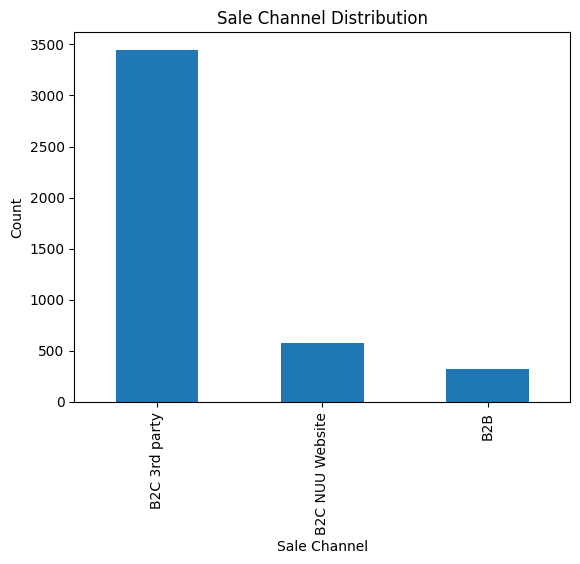

In [66]:
feature = 'Sale Channel'
# Display value counts for each feature
print(data[feature].value_counts())

# Plot the distribution of each feature
data[feature].value_counts().plot(kind='bar', title=f'{feature} Distribution')
plt.xlabel(feature)  # Adding x-label for clarity
plt.ylabel('Count')  # Adding y-label for clarity
plt.show()

Model
A23 Plus      1600
B20            602
A15            598
A25            410
B15            225
B30 Pro        194
B10            174
F4L            144
X6P             73
Earbuds A       72
A11L            52
Earbuds B       47
B20 TPU         38
A23Plus         24
Tab 8 Plus      23
 A23 Plus       12
A10L            10
Buds B           9
A25              7
A23 PLus         5
N10              5
Buds A           4
Tab10            4
A9L              3
G5               2
A23              2
F4L              2
B30              2
B30              2
EArbuds A        2
Name: count, dtype: int64


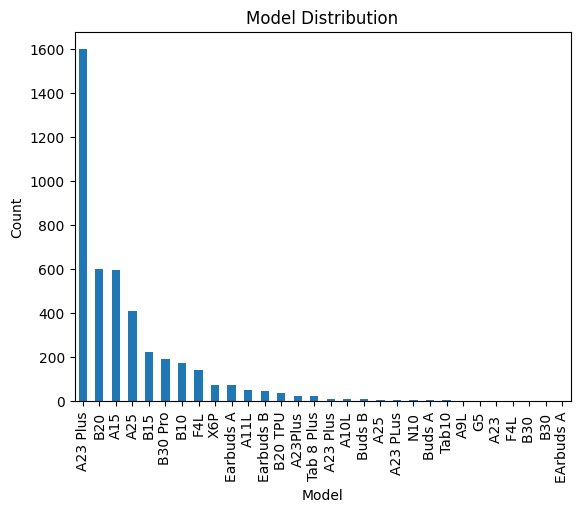

In [67]:
feature = 'Model'
# Display value counts for each feature
print(data[feature].value_counts())

# Plot the distribution of each feature
data[feature].value_counts().plot(kind='bar', title=f'{feature} Distribution')
plt.xlabel(feature)  # Adding x-label for clarity
plt.ylabel('Count')  # Adding y-label for clarity
plt.show()

Warranty
Yes    3950
No      392
Name: count, dtype: int64


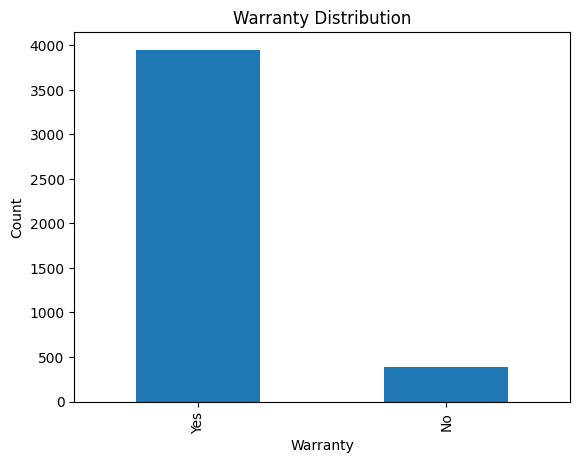

In [68]:
feature = 'Warranty'
# Display value counts for each feature
print(data[feature].value_counts())

# Plot the distribution of each feature
data[feature].value_counts().plot(kind='bar', title=f'{feature} Distribution')
plt.xlabel(feature)  # Adding x-label for clarity
plt.ylabel('Count')  # Adding y-label for clarity
plt.show()

In [71]:
feature = 'Feedback'

# Display value counts for each feature
print(data[feature].value_counts())

Feedback
Amazon Return                           2088
Website Return                           122
Premier Wireless Return                   50
device doesn't charge                     24
device will not charge                    20
                                        ... 
device freezes and restarts randomly       1
device is charging slow                    1
Walmart Return                             1
Vendor Return                              1
BwP testing                                1
Name: count, Length: 241, dtype: int64


Defect / Damage type
No defect                   2177
Hardware                     281
Display or TP                 80
Microphone/Speaker            40
Power (non battery)           36
Software                      33
Battery                       12
Camera                         8
Buttons Physical               5
Receive/Transmit/Antenna       4
Swollen Battery and LCD        2
Name: count, dtype: int64


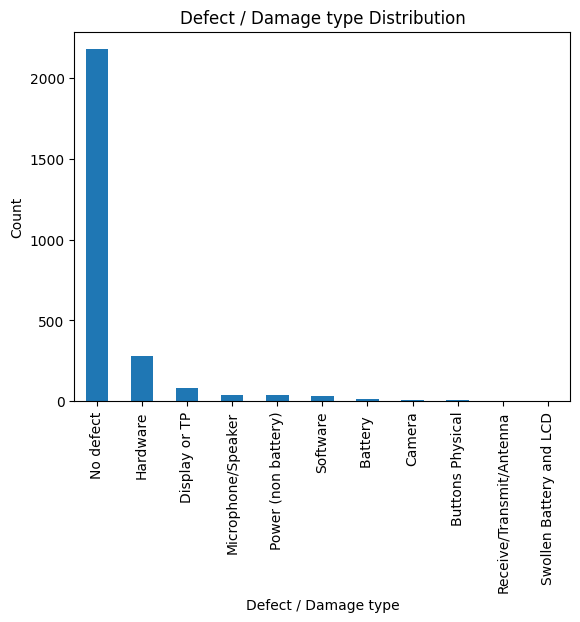

In [70]:
feature = 'Defect / Damage type'

# Display value counts for each feature
print(data[feature].value_counts())

# Plot the distribution of each feature
data[feature].value_counts().plot(kind='bar', title=f'{feature} Distribution')
plt.xlabel(feature)  # Adding x-label for clarity
plt.ylabel('Count')  # Adding y-label for clarity
plt.show()

Responsible Party
Customer: Remorse      2148
Factory: Defective      245
Customer: Damaged       188
Tested but No Issue      72
Paid RMA                 24
Name: count, dtype: int64


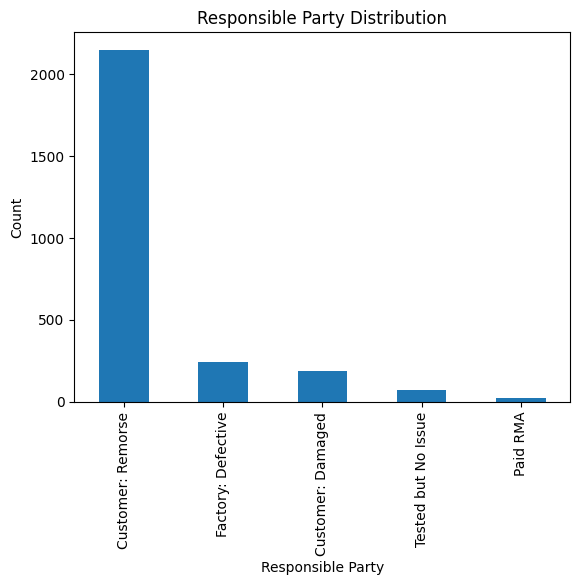

In [72]:
feature = 'Responsible Party'

# Display value counts for each feature
print(data[feature].value_counts())

# Plot the distribution of each feature
data[feature].value_counts().plot(kind='bar', title=f'{feature} Distribution')
plt.xlabel(feature)  # Adding x-label for clarity
plt.ylabel('Count')  # Adding y-label for clarity
plt.show()

Type
Return    2292
Repair     389
Name: count, dtype: int64


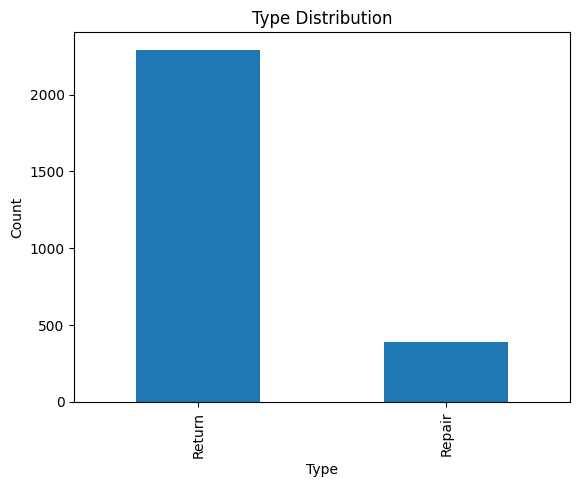

In [73]:
feature = 'Type'

# Display value counts for each feature
print(data[feature].value_counts())

# Plot the distribution of each feature
data[feature].value_counts().plot(kind='bar', title=f'{feature} Distribution')
plt.xlabel(feature)  # Adding x-label for clarity
plt.ylabel('Count')  # Adding y-label for clarity
plt.show()

Final Status
Refurb B                                              1543
Refurb A                                               426
SBC                                                    264
New                                                    225
Write-off                                               66
Write-off - Replacement Sent                            59
Defective - Pending to repair and replacement sent      33
Defective - Pending ro repair                           26
B2B-TBD                                                 24
Send back to HK                                         11
Customer disposal                                        3
Marketing Sample                                         1
Name: count, dtype: int64


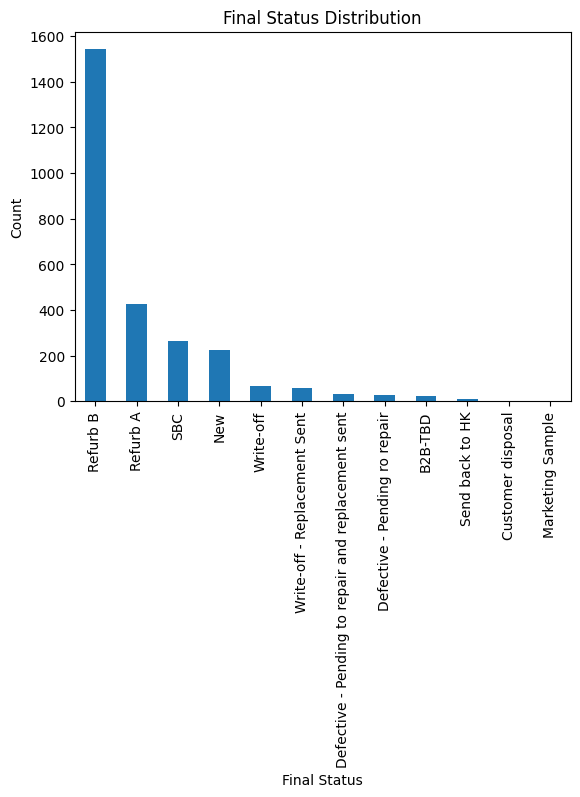

In [74]:
feature = 'Final Status'

# Display value counts for each feature
print(data[feature].value_counts())

# Plot the distribution of each feature
data[feature].value_counts().plot(kind='bar', title=f'{feature} Distribution')
plt.xlabel(feature)  # Adding x-label for clarity
plt.ylabel('Count')  # Adding y-label for clarity
plt.show()